### 부스팅(Boosting)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있습니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.datasets import load_iris
import missingno as ms

# 1. 사용할 학습기 정하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ensemble 넣어주기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import load_breast_cancer

# 2. preprocessing + model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,cross_val_score, cross_validate

# 3. 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve


### AdaBoost
- 정의 : 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 결합한 모델을 생성

In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [9]:
def human_activity_dataset():

    # HAR 데이터를 이용해서 RandomForest 배깅을 이용한 분류예측
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv('./data/features.txt', sep='\s+',
                                                         header=None, names=['column_index', 'column_name'])
    feature_name_df.head()

    # 중복 피처에 대한 에러처리 구문
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    new_feature_name_df.head()


    # 데이터프레임에 피처명을 컬럼으로 뷰어하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    feature_name

    # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
    # 컬럼명은 feature_name 적용
    # X_train = pd.read_Csv('.data/train/X_train.txt')
    #     X_train = pd.read_csv('./data/train/X_train.txt', sep='\s+', names=feature_name)
    #     X_test = pd.read_csv('./data/test/X_test.txt', sep='\s+', names=feature_name)

    X_train = pd.read_csv('./data/train/X_train.txt', sep='\s+', header=None, names=feature_name)
    #X_train.head()

    X_test = pd.read_csv('./data/test/X_test.txt', sep='\s+', header=None, names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('./data/test/y_test.txt', sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test


In [10]:
X_train, X_test, y_train, y_test = human_activity_dataset()

n_estimators와 learning_rate는 트레이드-오프 관계

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 70,
                               learning_rate = 0.5)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7638276213098066


In [17]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 70,
                               learning_rate = 0.3)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.6396335256192739


In [18]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 70,
                               learning_rate = 0.4)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7695961995249406


In [20]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 75,
                               learning_rate = 0.4)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7475398710553105


In [22]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 80,
                               learning_rate = 0.5)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7987784187309128


In [26]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 80,
                               learning_rate = 0.45)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

# learning_rate = 0.2 : 바운더리가 너무 촘촘해져서 성능이 저하된다.

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7315914489311164


In [27]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 80,
                               learning_rate = 0.55)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))

# learning_rate = 0.2 : 바운더리가 너무 촘촘해져서 성능이 저하된다.

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.7953851374278927


In [31]:
ada_model = AdaBoostClassifier(random_state = 0,
                               n_estimators = 60,
                               learning_rate = 0.4)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('예측 정확도: ', accuracy_score(y_test, y_pred))


C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 정확도:  0.8187987784187309


### GBM

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [40]:
start_time = time.time()
gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

print("수행시간: ", time.time()-start_time)

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


수행시간:  147.78168487548828


In [41]:
print('정확도: ', accuracy_score(y_test, y_pred))

정확도:  0.9375636240244316


In [45]:
# 하이퍼 파라미터 튜닝을 이용한 예측 정확도를 실습해보세요
start_time=time.time()

hyper_gbc_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample=1)

hyper_gbc_model.fit(X_train, y_train)
h_pred = hyper_gbc_model.predict(X_test)

print('수행시간: ', time.time() - start_time)
print('정확도: ', accuracy_score(y_test, h_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


수행시간:  213.6451756954193
정확도:  0.9385816084153377


In [46]:
# 하이퍼 파라미터 튜닝을 이용한 예측 정확도를 실습해보세요
start_time=time.time()

hyper_gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5)

hyper_gbc_model.fit(X_train, y_train)
h_pred = hyper_gbc_model.predict(X_test)

print('수행시간: ', time.time() - start_time)
print('정확도: ', accuracy_score(y_test, h_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


수행시간:  111.68026566505432
정확도:  0.9406175771971497


In [47]:
# 하이퍼 파라미터 튜닝을 이용한 예측 정확도를 실습해보세요
start_time=time.time()

hyper_gbc_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample=0.5)

hyper_gbc_model.fit(X_train, y_train)
h_pred = hyper_gbc_model.predict(X_test)

print('수행시간: ', time.time() - start_time)
print('정확도: ', accuracy_score(y_test, h_pred))

C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


수행시간:  154.47244668006897
정확도:  0.9375636240244316


In [62]:
def classifier_eval(y_test, y_pred) :
    print('오차행렬: ', confusion_matrix(y_test, y_pred))
    print('정확도: ', accuracy_score(y_test, y_pred))
#     print('정밀도: ', precision_score(y_test, y_pred))
#     print('재현율: ', recall_score(y_test, y_pred))
#     print('F1 score: ', f1_score(y_test, y_pred))
#     print('AUC: ', roc_auc_score(y_test, y_pred))

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:

start_time = time.time()
gbc_model = GradientBoostingClassifier(random_state=0)
params = {
    'n_estimators':[200], 
    'learning_rate': [0.05, 0.1, 0.15]
}
gbc_gscv_model = GridSearchCV(gbc_model, param_grid= params, cv=2 )

gbc_gscv_model.fit(X_train, y_train)

print('수행시간: ', time.time() - start_time)
print('최적의 하이퍼 파라미터: ', gbc_gscv_model.best_params_)
print('예측정확도: ', gbc_gscv_model.best_score_)


C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

수행시간:  935.4336953163147
최적의 하이퍼 파라미터:  {'learning_rate': 0.05, 'n_estimators': 200}
예측정확도:  0.9007072905331882


In [63]:
gscv_pred = gbc_gscv_model.best_estimator_.predict(X_test)
classifier_eval(y_test, gscv_pred)

오차행렬:  [[486   5   5   0   0   0]
 [ 25 439   6   1   0   0]
 [  7  27 385   0   1   0]
 [  0   2   0 417  72   0]
 [  0   0   0  33 499   0]
 [  0   0   0   0   0 537]]
정확도:  0.9375636240244316


In [65]:
# 최적의 하이퍼 파라미터를 이용하여 랜덤포레스트를 다시 학습시켜보세요

hyper_gbc_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=0)

hyper_gbc_model.fit(X_train, y_train)
hyper_y_pred = hyper_gbc_model.predict(X_test)

print('튜닝을 통한 예측 정확도', accuracy_score(y_test, hyper_y_pred))



C:\Users\i\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


튜닝을 통한 예측 정확도 0.9375636240244316


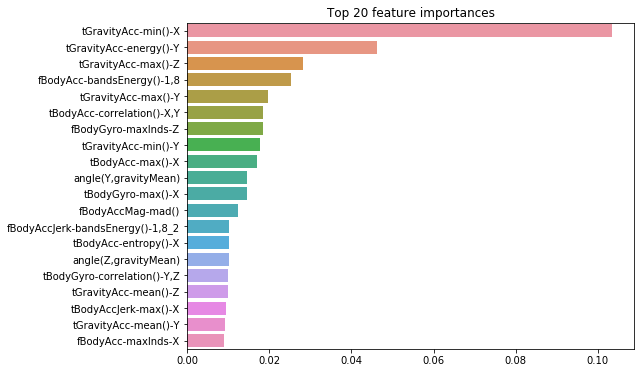

In [66]:
# 각 피처의 중요도를 시각화

ftr_importances_values = hyper_gbc_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Top 20 feature importances')

sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()
